In [10]:
# this time, we use more external modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import pygame
import time
import os


#playing and plotting data from a wave file

# pgame stuff related to playing sound
pygame.mixer.pre_init(24000, size=-16, channels=1)
pygame.mixer.init(buffer=2) # very small buffer here to reduce latency
pygame.init()



(6, 0)

In [12]:
# adding a sound file

# A sound file is a file with a special
# format which can be played with an audio
# player or by the computer
# we specifiy the name of the file 
# requires the wave module to be available
# if not, we have to skip to the part where
# we create the data ourselves ...
soundFile = "otto.wav"
# the we load the file into a variable
try:
    spf = wave.open(soundFile,'r')
except FileNotFoundError:
    soundFile = os.path.join("..","data",soundFile)
    print("New file:", soundFile)
    try:
        spf = wave.open(soundFile,'r')
    except FileNotFoundError:
        print("no file")
        sys.exit()
    
#Extract Raw Audio from Wav File, we don't play
# the whole file
signal = spf.readframes(20000 )#-1)
#signal = np.fromstring(signal, 'Int16')
signal = np.frombuffer(bytearray(signal),"Int16")
# remeber, this converts the data into a numpy array


# play the data  (will be brief!)
sd = pygame.mixer.Sound(signal)
sd.play()


New file: ../data/otto.wav


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


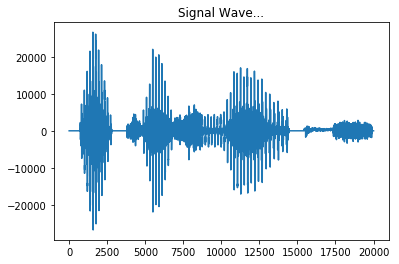

In [13]:
# now we plot the same data as a diagram
#plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()


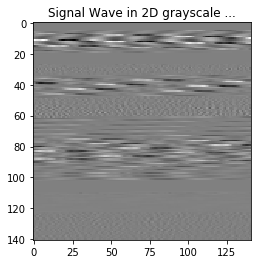

In [14]:
# we can also interpret the very same data as a
# 2 dimensional array, which is effectively an image
# we can also create a 2d plot in the following way
# reshape the vector into a symetric 2d array
ncols = np.trunc(np.sqrt(len(signal))) # get lower bound of square root
signal = signal[:int(ncols*ncols)]  # take correct number of samples
signal2d = np.reshape(signal, (-1, int(ncols))) # reshape
plt.imshow(signal2d,cmap='gray') # create image
plt.title('Signal Wave in 2D grayscale ...')
plt.show()


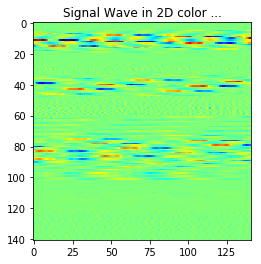

In [15]:
# we can also use colors
plt.imshow(signal2d,cmap='jet') # create image
plt.title('Signal Wave in 2D color ...')
plt.show()


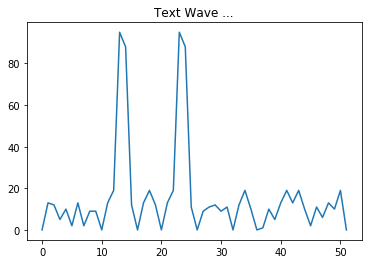

In [16]:
# you can now enter data by your own, either as a list
# of numbers like [1,2,3 ...] or as a text
# and convert to np.array()

signal = "dqpinfqfmmdqwüpdqwpdqwüodmopmodpwndeniqwqwnfojqnwd"
#signal = np.fromstring(signal, "uint8")
#there is a warning on the use of fromstring with utf-8 strings
# we can use instead this one:
signalbuf = np.array(bytes(signal,"utf-8"))
signal = np.frombuffer(signalbuf,dtype=np.uint8)
# text usually have a baseline value, which can be removed
# like so: Subtract the minimum value of the array from all
# elements
signal -= min(signal)
plt.title('Text Wave ...')
plt.plot(signal)
plt.show()



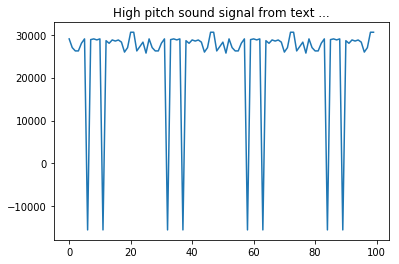

In [22]:
# make a longer array from your text and play as audio file
# refresh text
signal = "dqpinfqfmmdqwüpdqwpdqwüodmopmodpwndeniqwqwnfojqnwd"
# make list longer
longSignal = signal * 100
# create array
#longSignal = np.fromstring(longSignal, "int16")
longSignal = np.frombuffer(bytearray(longSignal,"utf-8"),"int16")
# plot the new signal ....
plt.plot(longSignal[0:100])
plt.title('High pitch sound signal from text ...')
plt.show()
# play
sd = pygame.mixer.Sound(longSignal)
sd.play()
# wait until the sound is finished
while pygame.mixer.get_busy():
    pass
# wait another half second
time.sleep(.5)



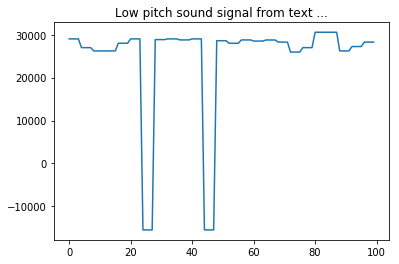

In [23]:
# make a lower tone by repeating each element individually
longSignal = np.repeat(longSignal, 4)
# plot the new signal ....
plt.plot(longSignal[0:100])
plt.title('Low pitch sound signal from text ...')
plt.show()
# play
sd = pygame.mixer.Sound(longSignal)
sd.play()